<table class="table table-bordered">
    <tr>
        <th style="text-align:center; width:25%"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 250px; height: 125px; "></th>
        <th style="text-align:center;"><h1>Deep Learning</h1><h2>Practical 9b - Keras Callbacks and Tensorboard</h2><h3>AY2020/21 Semester</h3></th>
    </tr>
</table>

In [1]:
from tensorflow import keras
print('keras: ', keras.__version__)

keras:  2.2.4-tf


In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [3]:
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
max_features = 10000
max_len = 200
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)
print(x_train.shape)

(25000, 200)


In [5]:
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Embedding(max_features, 128,input_length=max_len,
name='embed'))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))
model.summary()
model.compile(optimizer=RMSprop(lr=1e-4),
loss='binary_crossentropy',
metrics=['acc'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embed (Embedding)            (None, 200, 128)          1280000   
_________________________________________________________________
conv1d (Conv1D)              (None, 194, 32)           28704     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 38, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 32, 32)            7200      
_________________________________________________________________
global_max_pooling1d (Global (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 1,315,937
Trainable params: 1,315,937
Non-trainable params: 0
______________________________________________

In [6]:
callbacks = [
keras.callbacks.TensorBoard(
log_dir='my_log_dir',
histogram_freq=1,)
]
history = model.fit(x_train, y_train,
epochs=10,
batch_size=128,
validation_split=0.2,
callbacks=callbacks)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 11s 525us/sample - loss: 0.8813 - acc: 0.5092 - val_loss: 0.6857 - val_acc: 0.5550
Epoch 2/10
20000/20000 [==============================] - 6s 317us/sample - loss: 0.6719 - acc: 0.6412 - val_loss: 0.6692 - val_acc: 0.6446
Epoch 3/10
20000/20000 [==============================] - 6s 311us/sample - loss: 0.6370 - acc: 0.7374 - val_loss: 0.6330 - val_acc: 0.6976
Epoch 4/10
20000/20000 [==============================] - 6s 316us/sample - loss: 0.5677 - acc: 0.7931 - val_loss: 0.5343 - val_acc: 0.7822
Epoch 5/10
20000/20000 [==============================] - 6s 310us/sample - loss: 0.4462 - acc: 0.8320 - val_loss: 0.4357 - val_acc: 0.8242
Epoch 6/10
20000/20000 [==============================] - 6s 317us/sample - loss: 0.3667 - acc: 0.8630 - val_loss: 0.4254 - val_acc: 0.8390
Epoch 7/10
20000/20000 [==============================] - 6s 315us/sample - loss: 0.3145 - acc: 0.8845 - val_l

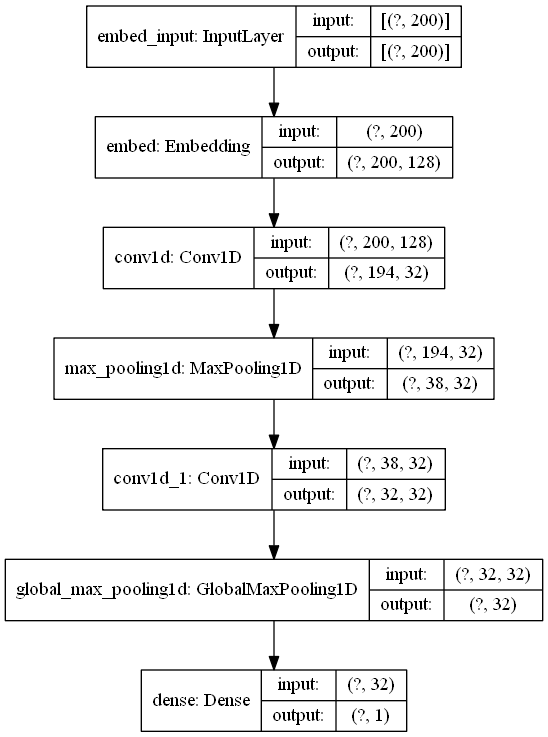

In [8]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes = True, to_file='model2.png')